# 1. Аналитическая запись градиента 

$$ f_{\mu}(X) = conj(f(x)) - \frac{\mu*||Y||_F^2}{2}, f(X) = ||X||_* $$

Will find dual $||X||_*$. From there(https://math.stackexchange.com/questions/1158798/show-that-the-dual-norm-of-the-spectral-norm-is-the-nuclear-norm), get $ ||X||_* = sup <X, Y>, ||Y||_2 \leq 1$.



Then $ f_{\mu}(X) = sup_{||Y||_2 \leq 1} <X, Y> - \frac{\mu*||Y||_F^2}{2} $ 

Rewrite

$ f_{\mu} (X) = min_{||Y||_2 \leq 1} \frac{\mu}{2}(Y, Y) - <X, Y> = min_{||Y||_2 \leq 1} \frac{\mu}{2}(Y - \frac{X}{\mu})^2 - \frac{X^2}{2\mu}$

The minimum is  $ Y = \frac{X}{\mu} $. Тогда условие $||Y||_2 \leq 1 $is the same as $ || \frac{X}{\mu} ||_2 = ||U(\frac{1}{\mu})SV|| = ||U(\frac{S}{\mu})V||\leq 1 $, $\sigma_{max}(\frac{X}{\mu})= \sigma_{max}(X) \leq \mu $.

 $ ||X||_2 = \sigma_{max}(X) $

For other case, when $||Y||_2 > 1$, или, $\sigma_{max}(X) > \mu $, the minimal value $Y=1$.

gradient

$$\nabla f_{\mu} (X) = \begin{cases}
  \frac{X}{\mu},  & \mbox{if } \sigma_{max}(X) \mbox{ $\leq \mu$} \\
  1, & \mbox{if } \sigma_{max}(X) \mbox{ $> \mu $}
\end{cases}$$

# Fast gradient

http://www.seas.ucla.edu/~vandenbe/publications/nucnrm.pdf(стр 3)



Another possibility is to replace the cost function with a smooth approximation and then minimize the smooth approximation by a fast gradient method. For example, a smooth approximation of the func $||X||_*$ is obtained by taking the SVD, $X = \sum_{i=1}^{r}\sigma_iu_iv_i^T$, replacing with singular values as

$$h_\mu(\sigma_i) = \begin{cases}
  \frac{\sigma_i^2}{2\mu},  & \mbox{if } \sigma_i \mbox{ $\leq \mu$} \\
  \sigma_i-\frac{\mu}{2}, & \mbox{if } \sigma_i \mbox{ $> \mu $}
\end{cases}$$

where $\mu$ is a small positive parameter, and defining $f_\mu(X) =  \sum_{i=1}^{r} h_{\mu}(\sigma_i)u_iv_i^T $. It can be shown that  $ f_{\mu}(X) = sup_{||Y||_2 \leq 1} tr(X^T Y) - \frac{\mu*||Y||_F^2}{2} $

The algorithm itself is from that article (https://core.ac.uk/download/pdf/191095369.pdf) in 3.11.



For $ k \geq 0 $ do

1. Compute$ f(x_k)$ and $\nabla f(x_k)$.
2. Find $ y_k = T_Q(x_k)$
3. Find $ z_k = agmin_x \{ \frac{L}{\sigma}d(x) + \sum_{i = 0}^k \frac{i+1}{2}[f(x_i) + <\nabla f(x_i), x - x_i>:x \in Q]$
4. Set $x_{k+1} = \frac{2}{k+3}z_k + \frac{k+1}{k+3}y_k $

Where $T_Q(X) \in Q$ the optimal solution of the following minimization problem:

$ min_y \{< \nabla  f(x), y - x> + \frac{1}{2} L ||y-x||^2: y \in Q \}$

$$f_\mu(X) =  \sum_{i=1}^{r} h_{\mu}(\sigma_i)u_iv_i^T  = sup_{||Y||_2 \leq 1} tr(X^T Y) - \frac{\mu*||Y||_F^2}{2}$$


Сам алгоритм.

For $ k \geq 0 $ do

1. Compute$ f(x_k)$ and $\nabla f(x_k)$.
2. Find $ y_k = T_Q(x_k)$
3. Find $ z_k = agmin_x \{  \sum_{i = 0}^k \frac{i+1}{2}[f(x_i) + <\nabla f(x_i), x - x_i>:x \in Q]$
4. Set $x_{k+1} = \frac{2}{k+3}z_k + \frac{k+1}{k+3}y_k $

Where $T_Q(X) \in Q$ the optimal solution of the following minimization problem:

$ min_y \{< \nabla  f(x), y - x> + \frac{1}{2} L ||y-x||^2: y \in Q \}$

In [1]:
import numpy as np
from numpy import tensordot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank as rank
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
from PIL import Image
from numpy import asarray

In [2]:
#Function for drawing picture
def plot_image(vec, title="", xlabel="", ylabel="", shift=0, newshape=None, **kwargs): # вспомогательная ф-ция 

    if newshape is None:
        plt.matshow(vec[:,shift:], cmap="gray", **kwargs)
    else:
        plt.matshow(vec.reshape(newshape[0], newshape[1])[:,shift:], cmap="gray", **kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [3]:
#Take random picture
path = "./chaplin.jpg"
image = Image.open(path).convert('L')
image = asarray(image)

In [4]:
path = "./29_groundtruth.jpg"
image = Image.open(path).convert('L')
image = asarray(image)

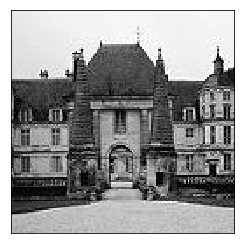

In [5]:
#Original picture
plot_image(image)

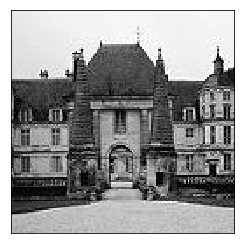

In [81]:
plot_image(image)

In [6]:
path1 = "./29_masked.jpg"
image1 = Image.open(path1).convert('L')
image1 = asarray(image1)

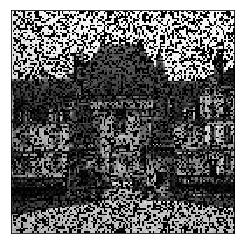

In [7]:
plot_image(image1)

In [9]:
image1

array([[243, 222, 237, ..., 252, 248, 243],
       [223, 237,   7, ..., 230, 255, 241],
       [238, 226,   0, ...,   0, 249, 250],
       ...,
       [192, 186, 146, ...,   0, 197,   0],
       [167, 159, 175, ..., 214, 173, 189],
       [185, 191, 171, ..., 194, 187,   0]], dtype=uint8)

In [10]:
image

array([[233, 233, 233, ..., 247, 247, 247],
       [233, 233, 233, ..., 247, 247, 247],
       [233, 233, 233, ..., 247, 247, 247],
       ...,
       [179, 178, 167, ..., 199, 191, 194],
       [183, 179, 171, ..., 192, 178, 182],
       [182, 178, 174, ..., 195, 190, 204]], dtype=uint8)

In [94]:
def delete_pixels(image, p = 0.3):
    image = image.reshape(-1)
    dim = image.shape[0]
    random = np.random.choice(list(range(dim)), int((1-p)*dim), replace=False)
    return random, image[random] #indexes of 1_shape vector that will delete

In [95]:
index, y_true = delete_pixels(image)

In [53]:
#Code for one of the algorithms

def threshold(x, mu):
    if (mu >= x):
        return x/mu
    else:
        return 1
    
def grad1(X, mu):
    S, V, D = np.linalg.svd(X)
    ans = np.zeros(X.shape)
    for i in range(V.shape[0]):
        ans += threshold(V[i],mu)*np.tensordot(S[:,i].ravel(), D.T[:,i].ravel(), axes=((), ()))
    return ans

def update_true(X, ind, y):

    X1 = X.reshape(-1)
    X1[ind] = y
    return X1.reshape(X.shape)



In [54]:
#Code for algorithm

def fast_grad(X, y_true, mu, n_iter, index):
    X = update_true(np.zeros(X.shape), index, y_true)
    np.zeros(X.shape[0]*X.shape[1])[index] = y_true
    iteratives = []
    gradient = np.zeros(X.shape)
    sum_grad = np.zeros(X.shape)
    for k in range(n_iter):
        gradient = grad1(X, mu)
        sum_grad +=  (k+1)/2*gradient
        y = X - 1/mu*gradient
        z = - mu*sum_grad
        X = 2/(k+3)*z + (k+1)/(k+3)*y
        iteratives.append(X)
        X = update_true(X, index, y_true) #поддерживание известных значений Xij = Yij
        
    return iteratives

In [55]:
#There check difference in metric for each iteration -> np.linalg.norm
def plot_L1_loss(true_image, reconstructions): 

    m,n = true_image.shape

    iterations = np.arange(len(reconstructions))
    losses =[]
    for it in iterations:
        loss = 0.0
        current_rec = reconstructions[it].reshape(m, n)
        loss = np.linalg.norm(current_rec - true_image,1)/(m*n)
        #loss = math.sqrt(np.linalg.norm(arr_matr.reshape((m, n)) - image,2)/np.linalg.norm(image,2))

        losses.append(loss)

    return losses

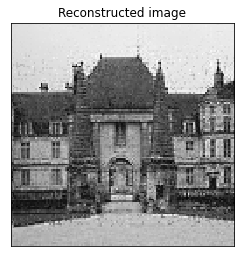

4.464353799819946


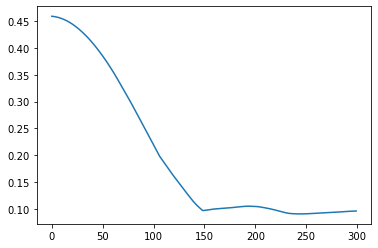

In [96]:
# ДЛя p = 0.7
import time
start = time.time()
n_iter = 300 
iteratives = fast_grad(image, y_true, mu = 1, n_iter = n_iter, index = index)
m = iteratives[0].shape[0]
n = iteratives[0].shape[1]
plot_image(iteratives[-1], title="Reconstructed image", newshape=(m, n))

losses = plot_L1_loss(image, iteratives)
plt.plot(np.arange(n_iter), losses)
print(time.time()-start)

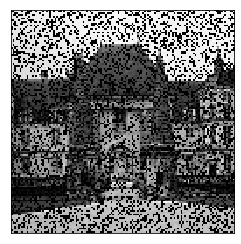

In [97]:
#just after deleting pixels

plot_image(iteratives[0], newshape=(m, n))

In [98]:
np.linalg.norm(iteratives[-1] - image,1)/(m*n)

0.09578351395797205

In [18]:
np.linalg.norm(iteratives[-1] - image,2)/(m*n)

0.04202200969956346

In [ ]:
np.linalg.norm(current_rec - true_image,1)/(m*n)

In [105]:
image.shape

(128, 128)

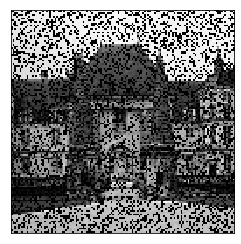

In [99]:
arr = np.zeros(128*128)
arr[index] = y_true
plot_image(arr, newshape=(m, n))

In [100]:
# Baseline
arr_matr = arr.reshape((m, n))
for i in range(m):
    for j in range(n):
        if arr_matr[i][j] == 0:
            if j != n-1 and j != 0:
                arr_matr[i, j] = np.maximum(arr_matr[i,j-1], arr_matr[i, j+1])
                

In [101]:
arr_matr = arr_matr.reshape(128*128)

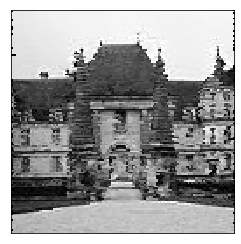

In [102]:
plot_image(arr_matr, newshape=(m, n))

In [88]:
np.linalg.norm(arr_matr.reshape((m, n)) - image,1)/(m*n)

1.14996337890625

In [43]:
import numpy as np
import math
math.sqrt(np.linalg.norm(arr_matr.reshape((m, n)) - image,2)/np.linalg.norm(image,2))

0.28753106816757584

# 3. Fast proximal gradient metrhod - FISTA




 On 9 FISTA's algorithm.https://arxiv.org/pdf/1802.08397.pdf

Initialization:

$R_1 = 0, t_1 = 1$


for k = 1, 2, ..., T do

$$ 1. X_k = D(R_k - \frac{1}{L}A^*(A(R_k)-y))$$

$$ 2. t_{k+1} = \frac{1 + \sqrt{1+4t_k^2}}{2} $$

$$ 3. R_{k+1} = X_k + \frac{t_k-1}{t_k+1}(X_k - X_{k-1}) $$

Выход $X_T$

Original task:

$\hat{X} = argmin_{X} ||X||_*$,s.t $ y = A(X)$

$\hat{X} = argmin_X \frac{1}{2}||y- A(X)||_2^2 +\tau ||X||_* $

proximal mapping 

$D_\tau(Y) = argmin_Z \frac{1}{2}||Y-Z||_F^2 + \tau||Y||_* $

If SVD is $Y = U\Sigma V^T $, where $\Sigma = diag[\sigma_1, \sigma_2, ..]$, then $D_\tau(Y) = U\Sigma^{'}V^T$, where $\Sigma^{'} = diag[\sigma_1^{'}, \sigma_2^{'}, ..] $


$$\sigma^{'}_k = \begin{cases}
  \sigma_k - \tau,  & \mbox{if } \sigma_k \mbox{ $\geq \tau$} \\
  0, & \mbox{if } \sigma_k \mbox{ $< \tau $}
\end{cases}$$

In [103]:
def singular_value_shrinkage1(X, alpha, newshape):
    X_ = X.reshape(newshape[0], newshape[1])
    U, s, VT = np.linalg.svd(X_, full_matrices=True)
    sthres = np.maximum(s - alpha, 0)
    S = np.zeros_like(X_)
    np.fill_diagonal(S, sthres)
    X_out = U@S@VT
    return X_out.reshape(newshape[0] * newshape[1])

def FISTA(A, y_true, m, n, lambda_, n_iter):
    '''
    Input:
        A: matrix that encodes the known entries
        lambda_: threshold for the singular value shrinkage operator.'''
    
    
    iteratives = []
    X_kminus1 = np.zeros((m*n))
    Y_k = np.zeros((m*n))
    #L=2
    #t_k = 1
    L = 1
    t_k = 0.5
    lambda_ = lambda_/L

    for k in range(n_iter):
        
        w = Y_k - 1/L*(A.T@(A@Y_k - y_true)) # 1/L*grad
        X_k = singular_value_shrinkage1(w, lambda_, newshape=(m,n))
        t_kplus1 = (1 + np.sqrt(1+4*t_k**2))/2
        Y_k = X_k + ((t_k-1)/t_kplus1)*(X_k - X_kminus1)
        X_kminus1 = X_k
        t_k = t_kplus1  
        iteratives.append(Y_k)
    
    return iteratives
    


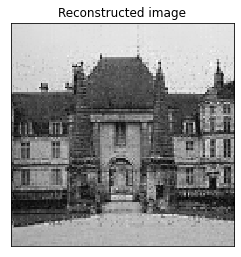

1.4861140251159668


In [104]:
m, n = image.shape
#index, y_true = delete_pixels(image, p)
el = len(index) 
A = csc_matrix((np.ones(el), (np.arange(el), index)), shape=(el, m*n))
#матрица А хранит единичные индексы для каждого элемента маски
start = time.time()
recs = FISTA(A, y_true, m, n, lambda_=20, n_iter=300)

plot_image(recs[-1], title="Reconstructed image", newshape=(m, n))
print(time.time()-start)

In [105]:
np.linalg.norm(recs[-1].reshape((128, 128)) - image,2)/(m*n)

0.026505769650883814

In [76]:
np.linalg.norm(recs[-1].reshape((128, 128)) - image,1)/(m*n)

0.16021558994633558

Will implement DRS, will take it from there. http://www.seas.ucla.edu/~vandenbe/236C/lectures/dr.pdf 

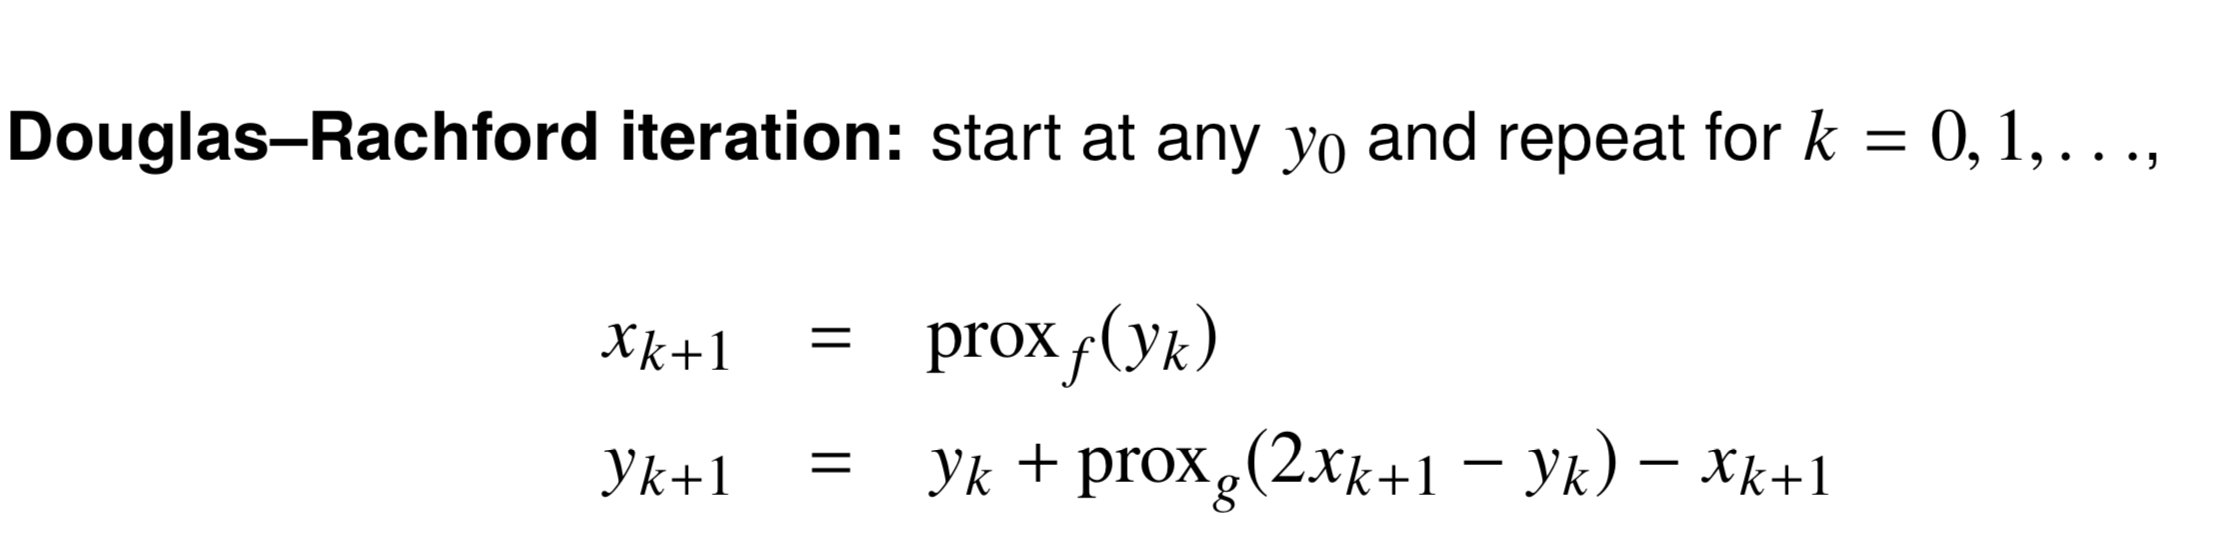

In [ ]:
Image(filename = './DRS.png', width = 600, height = 300)

In [46]:
def DRS(A, y_true, m, n, iterations, gamma):
    
    iteratives = []
    zk = np.zeros(m*n)
    
    for k in range(0, iterations):
        xk = zk + A.T @ (y_true - A@zk)
        
        yk = singular_value_shrinkage1(2*xk - zk , gamma, newshape=(m,n))
        zk = zk + yk - xk
        iteratives.append(zk)
    
    return iteratives

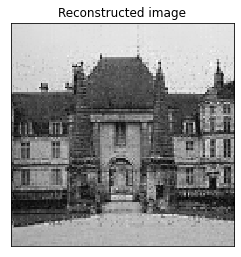

1.5746512413024902


In [106]:
#index, y_true = delete_pixels(image, p =0.7)
el = len(index) 
A = csc_matrix((np.ones(el), (np.arange(el), index)), shape=(el, m*n))

start = time.time()
recs_DRS = DRS(A, y_true, m, n,iterations = 300, gamma = 20)

plot_image(recs[-1], title="Reconstructed image", newshape=(m, n))
print(time.time()-start)


# Time of convergence

In [107]:
losses = plot_L1_loss(image, recs)
losses_fast = plot_L1_loss(image, iteratives)
losses_DRS = plot_L1_loss(image, recs_DRS)
lossec_baseline = np.ones(300)*np.linalg.norm(arr_matr.reshape((m, n)) - image,1)/(m*n)
iterations = np.arange(300)+1

Text(0.5, 1.0, 'Value L1 metrics for algorithms, deleted 30% pixels ')

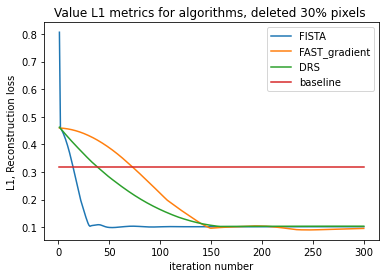

In [108]:
line_fista, = plt.plot(iterations,losses, label = 'FISTA')
line_fast, = plt.plot(iterations,losses_fast, label = 'FAST_gradient' )
line_DRS,  = plt.plot(iterations,losses_DRS, label = 'DRS' )
line_baseline, = plt.plot(iterations,lossec_baseline, label = 'baseline' )
plt.xlabel("iteration number")
plt.ylabel("L1, Reconstruction loss")
plt.legend(handles=[line_fista, line_fast, line_DRS,line_baseline ])
plt.title('Value L1 metrics for algorithms, deleted 30% pixels ')

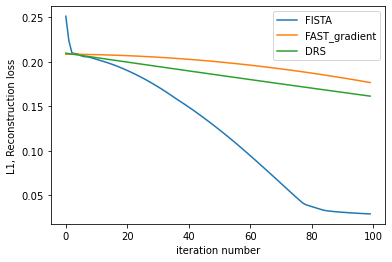

In [ ]:
line_fista, = plt.plot(iterations,losses, label = 'FISTA')
line_fast, = plt.plot(iterations,losses_fast, label = 'FAST_gradient' )
line_DRS,  = plt.plot(iterations,losses_DRS, label = 'DRS' )
plt.xlabel("iteration number")
plt.ylabel("L1, Reconstruction loss")
plt.legend(handles=[line_fista, line_fast, line_DRS ])

Fista has less error after 100 iterations. Для p = 0.7.

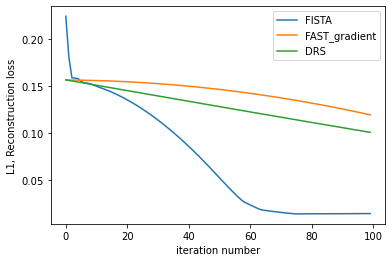

In [ ]:
line_fista, = plt.plot(iterations,losses, label = 'FISTA')
line_fast, = plt.plot(iterations,losses_fast, label = 'FAST_gradient' )
line_DRS,  = plt.plot(iterations,losses_DRS, label = 'DRS' )
plt.xlabel("iteration number")
plt.ylabel("L1, Reconstruction loss")
plt.legend(handles=[line_fista, line_fast, line_DRS ])

For p = 0.5 и 300 iterations

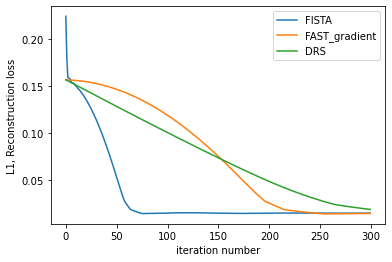

In [ ]:
iterations = np.arange(300)
line_fista, = plt.plot(iterations,losses, label = 'FISTA')
line_fast, = plt.plot(iterations,losses_fast, label = 'FAST_gradient' )
line_DRS,  = plt.plot(iterations,losses_DRS, label = 'DRS' )
plt.xlabel("iteration number")
plt.ylabel("L1, Reconstruction loss")
plt.legend(handles=[line_fista, line_fast, line_DRS ])

It is seen that all algorithms converges after  n = 300 iterations 
Fista is much faster than the otherrs
Fast gradient firstly is worse than DRS, than is better
Fista is the fastest algorithm

Fir n = 300, p =0.5
FISTA: 19.34 sec
DRS: 18.36 sec
FAST-grad: 113.3 sec

